In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [5]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df1=df.copy()
df1=df.rename({'R&D Spend':'RnD','Administration':'Admin','Marketing Spend':'MS','State':'state','Profit':'Pf'},axis=1)
df1.head()

,RnD,Admin,MS,state,Pf
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RnD     50 non-null     float64
 1   Admin   50 non-null     float64
 2   MS      50 non-null     float64
 3   state   50 non-null     object 
 4   Pf      50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df1.isna().sum()

RnD      0
Admin    0
MS       0
state    0
Pf       0
dtype: int64

In [9]:
import statsmodels.formula.api as smf 
model = smf.ols('Pf~RnD+Admin+MS',data=df1).fit()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Pf   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        12:23:12   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model.params

Intercept    50122.192990
RnD              0.805715
Admin           -0.026816
MS               0.027228
dtype: float64

In [11]:
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RnD          17.846374
Admin        -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
RnD          2.634968e-22
Admin        6.017551e-01
MS           1.047168e-01
dtype: float64


In [12]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple linear Regression Models

In [13]:
m1=smf.ols('Pf~RnD',data = df1).fit()  
#t and p-Values
print(m1.tvalues, '\n', m1.pvalues) 
(m1.rsquared,m1.rsquared_adj)

Intercept    19.320288
RnD          29.151139
dtype: float64 
 Intercept    2.782697e-24
RnD          3.500322e-32
dtype: float64


(0.9465353160804393, 0.9454214684987817)

In [14]:
m2=smf.ols('Pf~Admin',data = df1).fit()  
print(m2.tvalues, '\n', m2.pvalues) 
(m2.rsquared,m2.rsquared_adj)

Intercept    3.040044
Admin        1.419493
dtype: float64 
 Intercept    0.003824
Admin        0.162217
dtype: float64


(0.04028714077757223, 0.020293122877105052)

In [15]:
m3=smf.ols('Pf~MS',data = df1).fit()  
print(m3.tvalues, '\n', m3.pvalues) 
(m3.rsquared,m3.rsquared_adj)

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


(0.5591535746115515, 0.5499692740826254)

In [16]:
m12=smf.ols('Pf~RnD+Admin',data = df1).fit()  
print(m12.tvalues, '\n', m12.pvalues) 
(m12.rsquared,m12.rsquared_adj)

Intercept     9.122352
RnD          28.588870
Admin        -1.072677
dtype: float64 
 Intercept    5.695336e-12
RnD          2.278348e-31
Admin        2.888932e-01
dtype: float64


(0.9478129385009173, 0.9455922124796797)

In [17]:
m13=smf.ols('Pf~RnD+MS',data = df1).fit()  
print(m13.tvalues, '\n', m13.pvalues) 
(m13.rsquared,m13.rsquared_adj)

Intercept    17.463582
RnD          19.265555
MS            1.927052
dtype: float64 
 Intercept    3.504062e-22
RnD          6.040433e-24
MS           6.003040e-02
dtype: float64


(0.9504503015559763, 0.9483418037498477)

# Correlation Matrix

In [18]:
df1.corr()

,RnD,Admin,MS,Pf
RnD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Pf,0.972900,0.200717,0.747766,1.000000


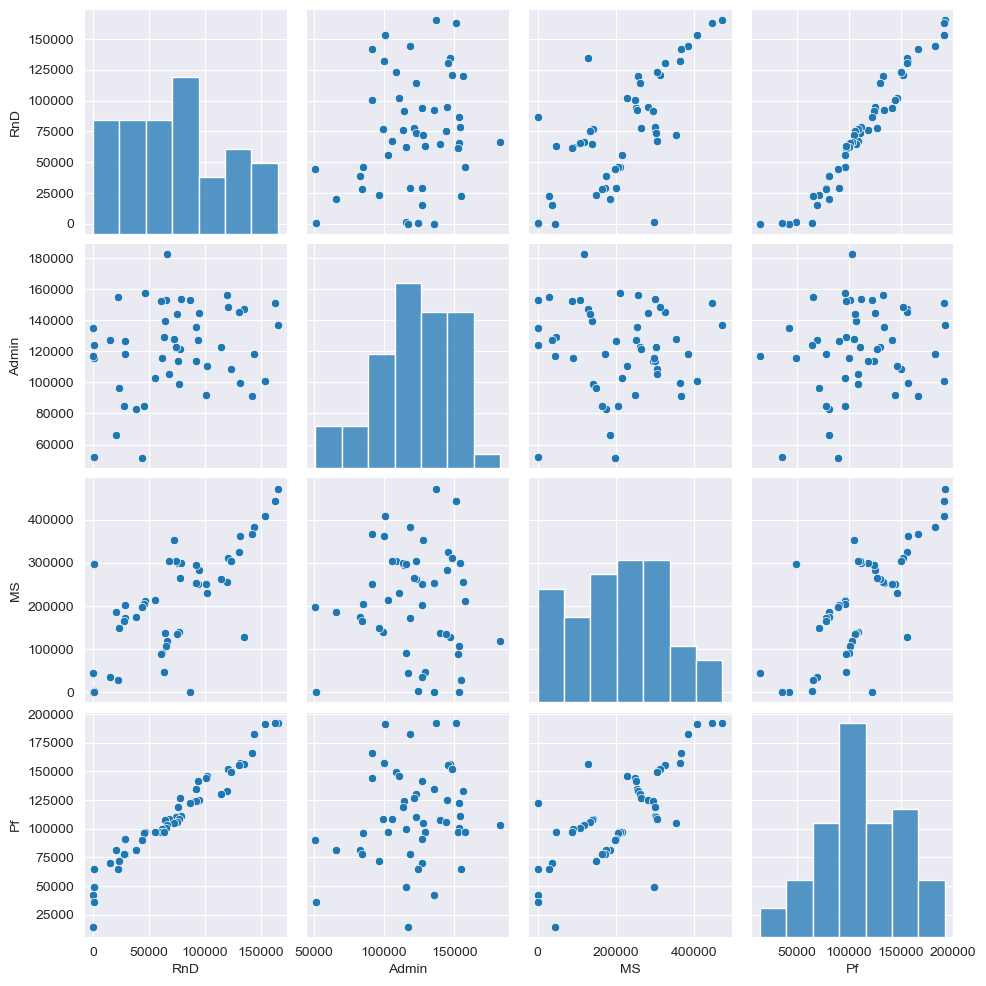

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

# Calculating VIF

In [20]:
rsq_RnD = smf.ols('RnD~Admin+MS',data=df1).fit().rsquared
vif_RnD = 1/(1-rsq_RnD)

rsq_Admin = smf.ols('Admin~RnD+MS',data=df1).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin) 

rsq_MS = smf.ols('MS~Admin+RnD',data=df1).fit().rsquared  
vif_MS = 1/(1-rsq_MS) 


# Storing vif values in a data frame
d1 = {'Variables':['RnD','Admin','MS'],'VIF':[vif_RnD,vif_Admin,vif_MS]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RnD,2.468903
1,Admin,1.175091
2,MS,2.326773


In [21]:
#Build model with RnD
import statsmodels.formula.api as smf 
model = smf.ols('Pf~RnD+Admin',data=df1).fit()
f'AIC:{model.aic}, rsq_RnD:{rsq_RnD}'

'AIC:1059.6636934567293, rsq_RnD:0.5949618224573936'

In [22]:
#Build model with MS
import statsmodels.formula.api as smf 
model = smf.ols('Pf~MS+Admin',data=df1).fit()
f'AIC:{model.aic}, rsq_MS:{rsq_MS}'

'AIC:1160.2648038638672, rsq_MS:0.5702202685282503'

# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

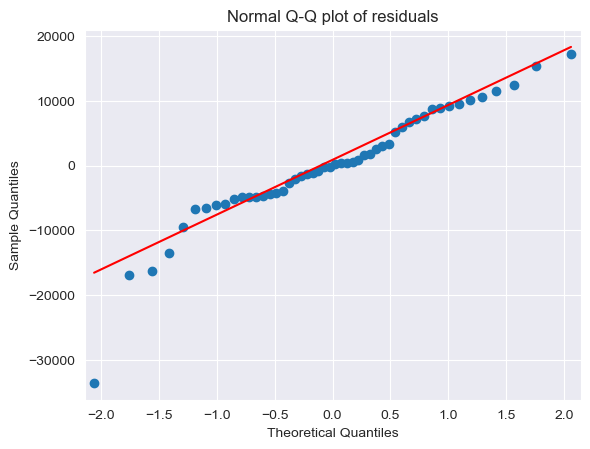

In [23]:
import statsmodels.api as sm

model = smf.ols('Pf~RnD+Admin+MS',data=df1).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [24]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

# Residual Plot for Homoscedasticity

In [25]:
model = smf.ols('Pf~RnD+Admin+MS',data=df1).fit()

In [26]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

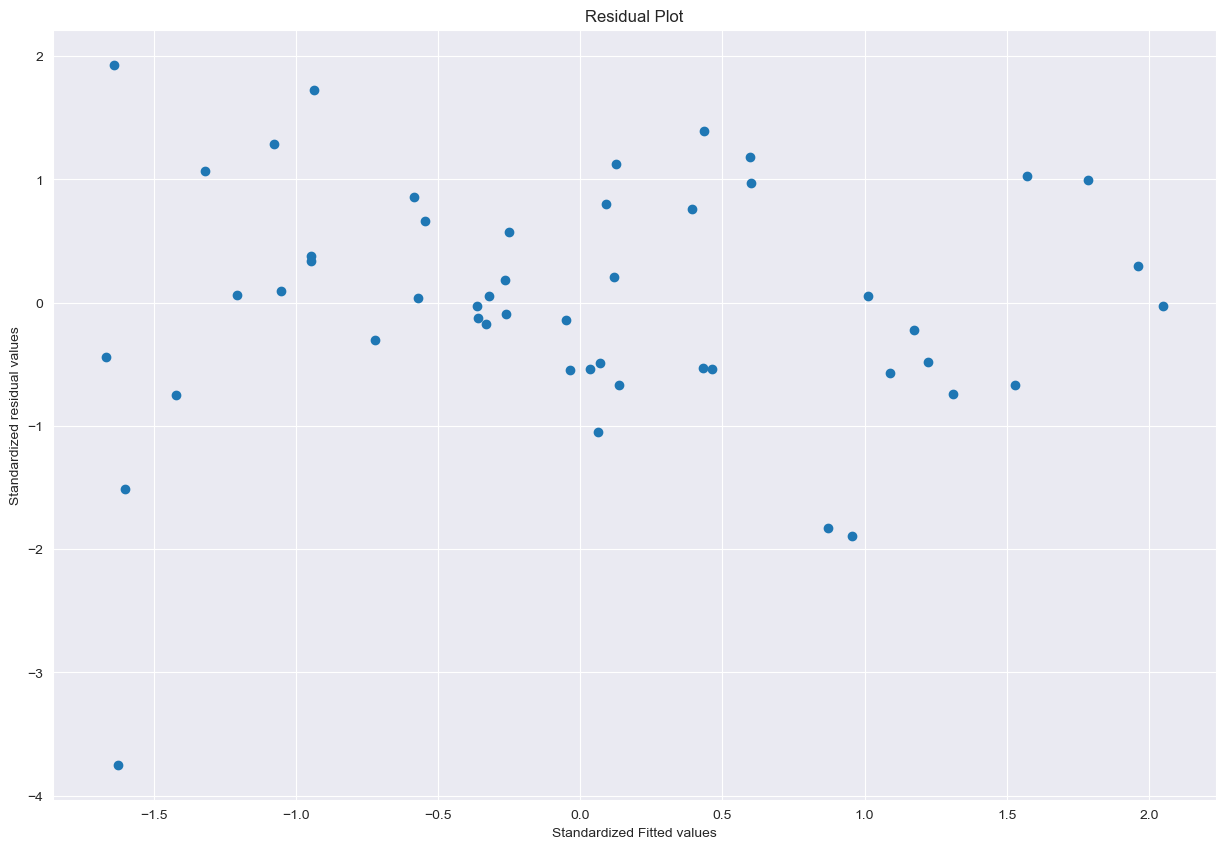

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


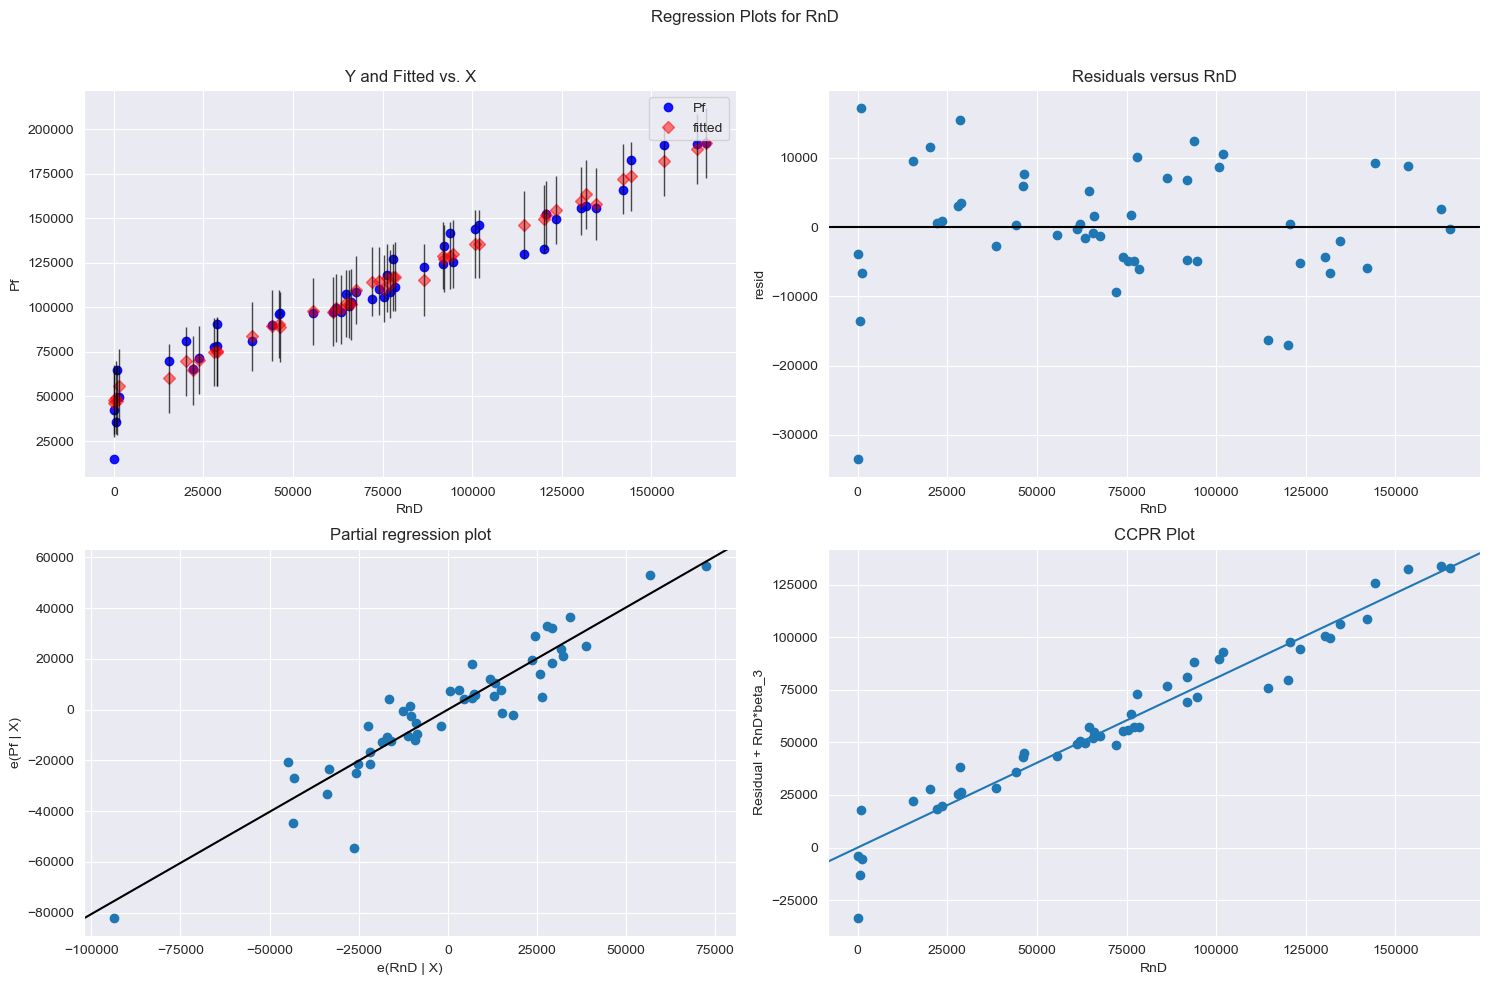

In [29]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "RnD", fig=fig)
plt.show()

eval_env: 1


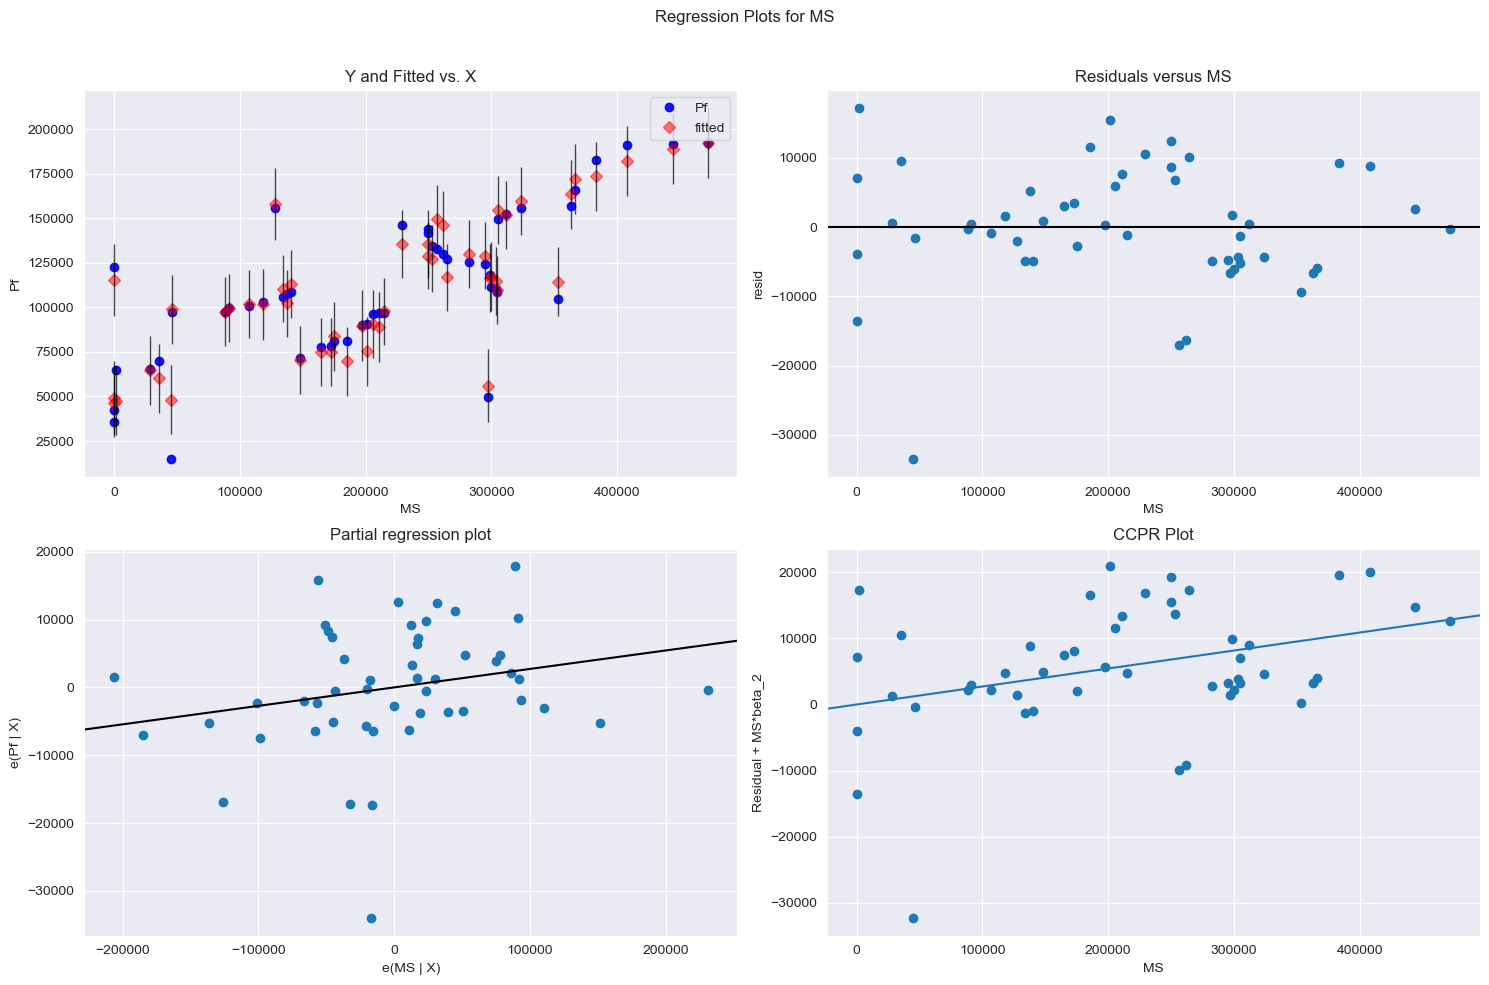

In [30]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance


In [31]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

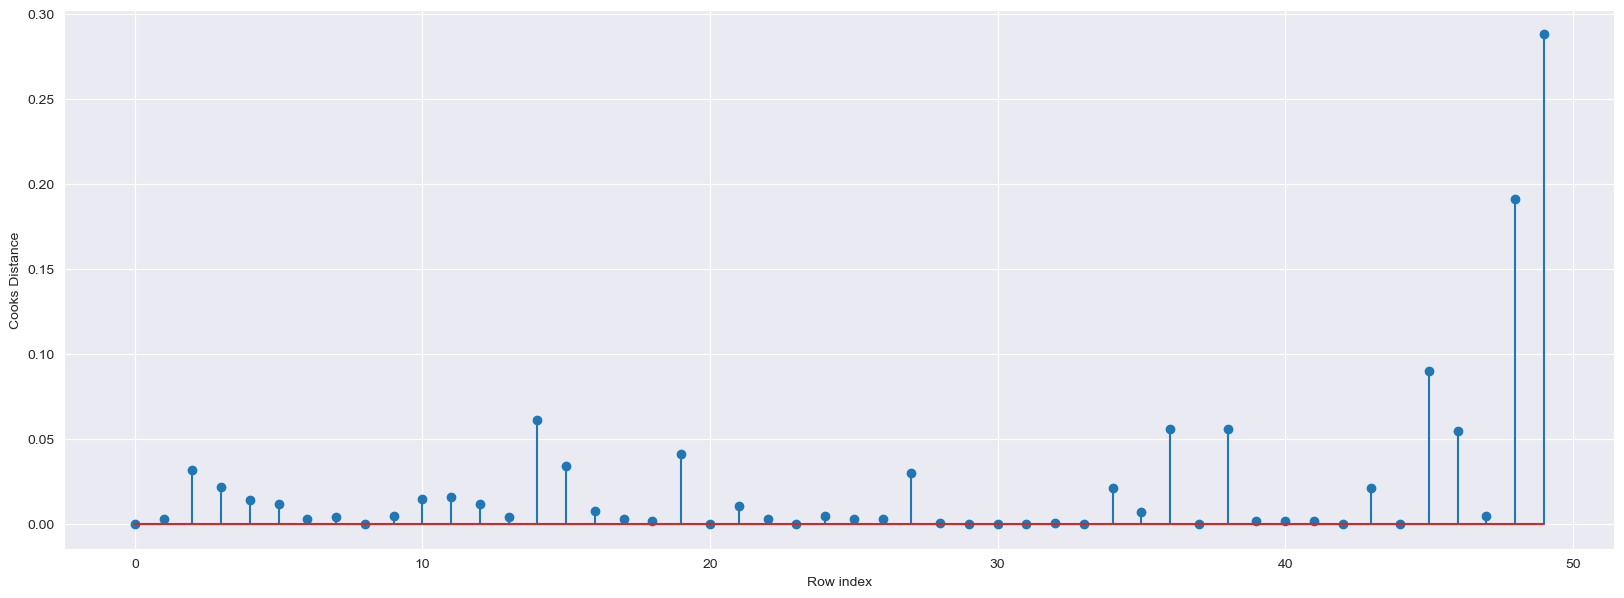

In [32]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

In [38]:
final_ml_V= smf.ols('Pf~RnD+MS+Admin',data = df1).fit()

In [41]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9507459940683246, 1058.7714985998055)